In [167]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np
X = np.matrix([[1,1],[1,2],[1,3],[1,4],[1,5]])
vector = [5,7,10,12,20]
predict= [[0.49, 0.18]]
deg = 3
poly = PolynomialFeatures(degree=deg)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, vector)
print (clf.predict(predict_))

[-0.37441307]


In [168]:
B = np.matrix(clf.coef_)

In [169]:
XX = X_[:,-7:]

In [170]:
B = B.reshape(-1,1)

In [171]:
B

matrix([[-3.85524945e-14],
        [ 6.43929354e-15],
        [ 2.87301587e+00],
        [ 0.00000000e+00],
        [ 2.87301587e+00],
        [-1.48214286e+00],
        [ 0.00000000e+00],
        [ 2.87301587e+00],
        [-1.48214286e+00],
        [ 4.16666667e-01]])

In [172]:
import matplotlib.pyplot as plt

In [173]:
X_

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   1.,   3.,   1.,   3.,   9.,   1.,   3.,   9.,  27.],
       [  1.,   1.,   4.,   1.,   4.,  16.,   1.,   4.,  16.,  64.],
       [  1.,   1.,   5.,   1.,   5.,  25.,   1.,   5.,  25., 125.]])

In [174]:
xplt = X_[:,-deg-1:]

In [175]:
X_[:,-deg-1:]

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [176]:
coef = clf.coef_[-deg-1:]

In [177]:
np.sum(xplt*coef,1)

array([ 1.80753968,  3.15079365,  6.5297619 , 14.44444444, 29.39484127])

In [178]:
np.squeeze(np.array(X[:,1]))

array([1, 2, 3, 4, 5])

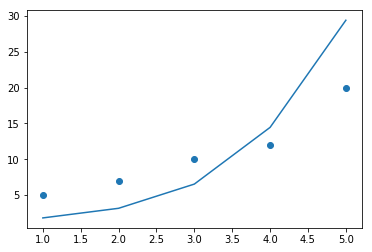

In [179]:
plt.scatter(np.squeeze(np.array(X[:,1])),vector)
plt.plot(np.squeeze(np.array(X[:,1])),np.sum(xplt*coef,1))

In [183]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [184]:
data = load_boston()

In [185]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.drop(['CHAS'],1,inplace=True) #dont need categorical data

In [186]:
X = np.array(df.values.tolist())
y = np.array(data['target'])

In [187]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [188]:
deg = 3
poly = PolynomialFeatures(degree=deg)
X_ = poly.fit_transform(scaled_X)

clf = linear_model.LinearRegression()
clf.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [189]:
clf.coef_

array([ 2.68152769e+04, -1.68408240e+04, -1.33666458e+04,  4.06020273e+04,
       -2.38014240e+04,  1.67165670e+01, -1.22562146e+02, -3.07047183e+02,
        3.34884994e+04, -6.40946544e+04,  2.80037540e+02,  9.87871208e+02,
        1.13263533e+02, -1.73702272e+04, -2.63355584e+04,  7.82195455e+03,
       -2.13112125e+03,  9.20809609e+01, -3.13607040e+02, -1.62688800e+02,
        1.11393631e+04, -1.80548011e+04,  2.63955099e+03,  1.22145159e+03,
        1.26557946e+02,  1.02410878e+03,  4.34682608e+03,  3.20055441e+03,
        3.52205809e+01, -1.96711774e+02, -5.96234802e+02, -1.67667344e+04,
       -1.07096956e+04, -3.04633921e+03,  1.36397373e+03,  2.19774438e+02,
        5.87783480e+04, -6.87360409e+04, -1.49908980e+02,  1.35032534e+02,
        1.68094423e+01,  7.97127224e+04, -2.92936361e+04,  4.01113877e+03,
       -1.48781903e+03, -1.75775447e+02,  7.58074237e+03,  4.07568760e+00,
        3.06402399e+00, -2.65325482e+01, -3.64042815e+04,  4.01104110e+04,
       -2.45250318e+03, -

In [190]:
y_pred = clf.predict(X_)

In [203]:
from sklearn.metrics import mean_squared_error, r2_score

In [204]:
mse = mean_squared_error(y,y_pred)

In [205]:
mse

0.37099974583251033

In [206]:
var_score = r2_score(y,y_pred)

In [208]:
var_score

0.9956052867045853